<a href="https://colab.research.google.com/github/owaisali8/TSF-GRIP-Tasks/blob/main/Data_Sci/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF** - Data Science & Business Analytics
## Task 1
### Name: Syed Owais Ali
---
Task: Predict score of a student based on study hours.  
Solution: Use Linear Regression 



In [ ]:
# Check Python version
import sys 
sys.version

'3.7.14 (default, Sep  8 2022, 00:06:44) \n[GCC 7.5.0]'

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
%matplotlib inline

In [ ]:
# Loading our data using pandas
df = pd.read_csv('http://bit.ly/w-data')

### Simple EDA on our Dataset

In [ ]:
df.info()
print("Shape:", end=" ")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
Shape: 

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# Checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Plotting our Dataset

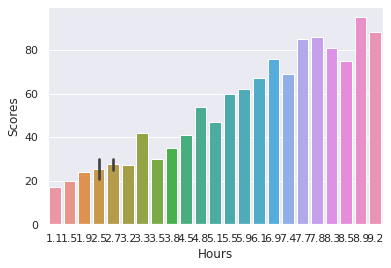

In [ ]:
sns.barplot(data=df, y='Scores', x='Hours')

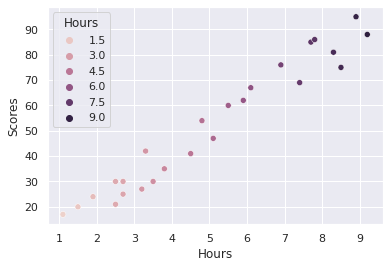

In [ ]:
sns.set_theme()
sns.scatterplot(data=df, y= "Scores", x="Hours", hue='Hours')

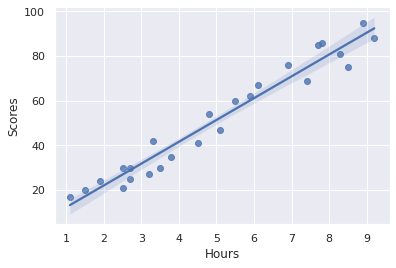

In [ ]:
sns.regplot(data = df, label="Reg Plot", y="Scores", x="Hours")

### Preparing data for our model

In [ ]:
X = df.Hours.values.reshape(-1,1)
y = df.Scores.values.reshape(-1,1)
print(X[:5])
print(y[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
[[21]
 [47]
 [27]
 [75]
 [30]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

### Making and Predicting our Model using Regression

In [ ]:
model = LinearRegression()  
model.fit(x_train, y_train) 
print('Done')

Done


In [ ]:
y_pred = model.predict(x_test)
result = pd.DataFrame({
    'Actual': [x[0] for x in y_test],
    'Predicted': [x[0] for x in y_pred]
})
result.head()

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


In [ ]:
#Prediction
predicted_score = model.predict([[9.25]])
print(f"Predicted score for 9.25 hours: {predicted_score[0][0]}")

Predicted score for 9.25 hours: 92.91505723477056


### Predicting our model using Decision Trees

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
print("Done")

Done


In [ ]:
y_tree_pred = tree_model.predict(x_test)
final_result = pd.DataFrame({
    'Actual': [x[0] for x in y_test],
    'DT': [x for x in y_tree_pred],
    'LR': [x[0] for x in y_pred]
})
final_result.head()

,Actual,DT,LR
0,20,17.0,17.053665
1,27,42.0,33.694229
2,69,85.0,74.806209
3,30,21.0,26.842232
4,62,67.0,60.123359


In [ ]:
#Prediction
predicted_score = tree_model.predict([[9.25]])
print(f"Predicted score for 9.25 hours: {predicted_score[0]}")

Predicted score for 9.25 hours: 88.0


### Evaluating Both Models

In [ ]:
print("Mean Absolute Error For Linear Regression:", mae(y_pred, y_test))
print("Mean Absolute Error For Decision Tree Regression:", mae(y_tree_pred, y_test))

Mean Absolute Error For Linear Regression: 4.419727808027651
Mean Absolute Error For Decision Tree Regression: 7.125


*lower is better*

Linear Regression is better than Decison Trees as its MAE is lower.

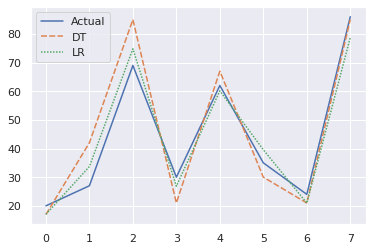

In [ ]:
sns.lineplot(data = final_result, )